# Car Price Predictor

In [100]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Load Data

In [101]:
df = pd.read_csv("/kaggle/input/car-prediction/CarPrice_Assignment.csv")
pd.set_option('display.max_columns', None)

In [102]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Visualization

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

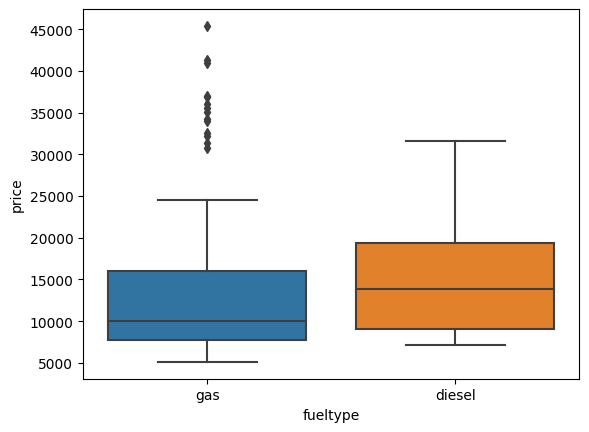

In [104]:
plt.figure()
sns.boxplot(x='fueltype', y='price', data=df)
plt.show()

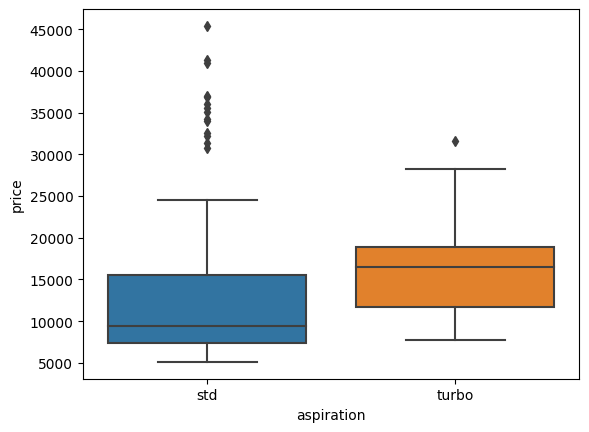

In [105]:
plt.figure()
sns.boxplot(x='aspiration', y='price', data=df)
plt.show()

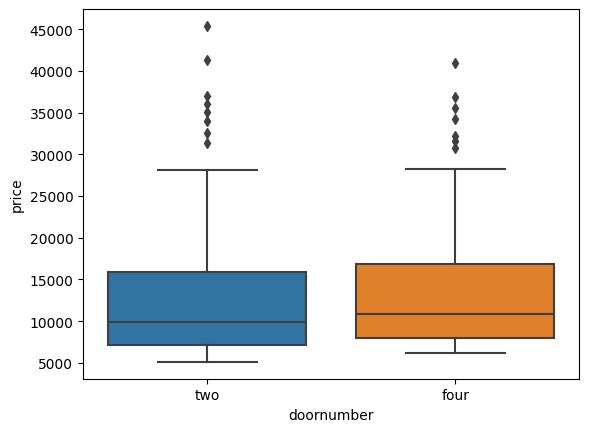

In [106]:
plt.figure()
sns.boxplot(x='doornumber', y='price', data=df)
plt.show()

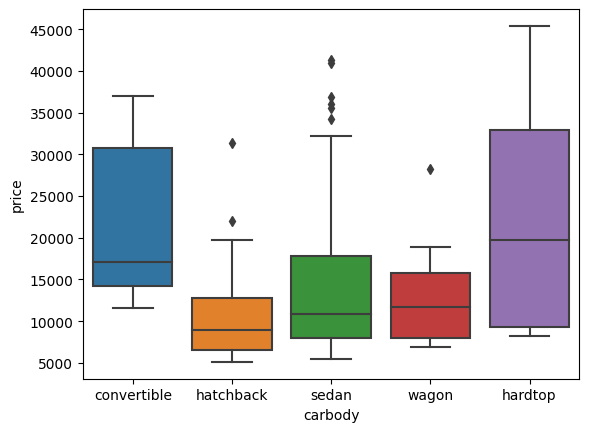

In [107]:
plt.figure()
sns.boxplot(x='carbody', y='price', data=df)
plt.show()

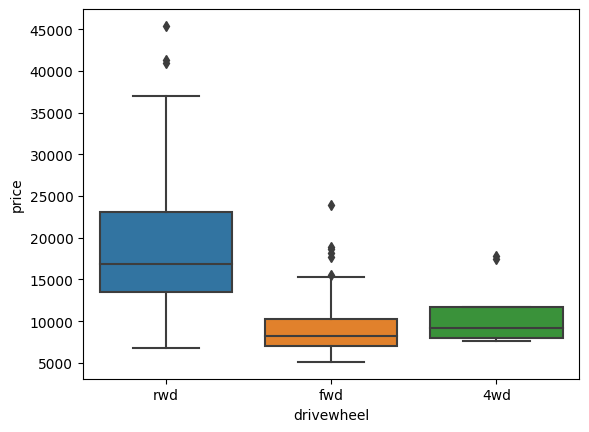

In [108]:
plt.figure()
sns.boxplot(x='drivewheel', y='price', data=df)
plt.show()

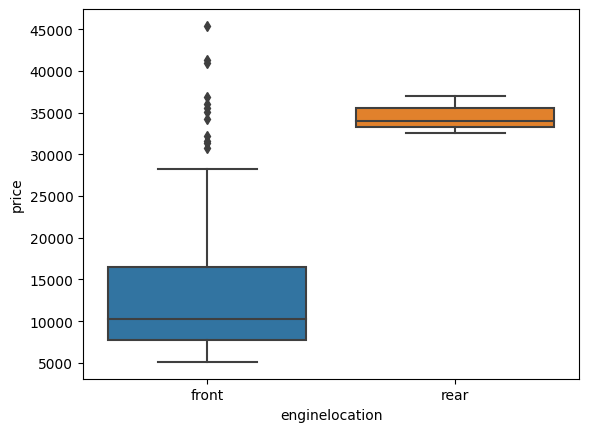

In [109]:
plt.figure()
sns.boxplot(x='enginelocation', y='price', data=df)
plt.show()

# Drop Unnecessary Columns

In [110]:
df = df.drop(columns =['CarName','car_ID'])

In [111]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Lable Encoder to convert string to integer

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le = LabelEncoder()

In [114]:
df['fueltype'] = le.fit_transform(df['fueltype']) 
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])

In [115]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# Checking the correlation of columns with price

In [116]:
correlation_coefficient = df['stroke'].corr(df['price'])
correlation_coefficient

0.079443083881931

In [117]:
correlation_coefficient = df[['symboling', 'fueltype','doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']].corr()['price']
correlation_coefficient

symboling          -0.079978
fueltype           -0.105679
doornumber         -0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

# Splitting Data

In [118]:
x= df.drop(columns =['symboling','fueltype','compressionratio','peakrpm','citympg','highwaympg','price'])
x

,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower
0,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,111
1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,111
2,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,154
3,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,102
4,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,114
201,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,160
202,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,134
203,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,106


In [119]:
y=df[['price']]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


# Checking the cross validation score with different algorithms

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [122]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

In [123]:
linear=cross_val_score(LinearRegression(), x_test, y_test,cv=9)
np.average(linear)

0.7605096654339922

In [124]:
final=LinearRegression()
final.fit(x_test,y_test)

LinearRegression()

In [125]:
final.score(x_test,y_test)

0.9327208201964192

# Got an Accuracy of 93 %